In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim.downloader as api

In [2]:
# === 1. Load Dataset Ceramah ===
df = pd.read_csv("ceramah2.csv")
text = " ".join(df['teks'].astype(str))  # Kolom isi ceramah

In [3]:
# === 2. Preprocessing Token ===
nltk.download('punkt')
nltk.download('stopwords')
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha()]  # buang angka dan simbol
tokens = [t for t in tokens if t not in stopwords.words('indonesian')]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Haryanto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haryanto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# === 3. Hitung Frekuensi dan Ambil Top 50 ===
word_counts = Counter(tokens)
top_words = [w for w, _ in word_counts.most_common(50)]

In [5]:
# === 4. Load Model GloVe ===
glove_model = api.load("glove-wiki-gigaword-100")  # 100 dimensi

[==================================================] 100.0% 128.1/128.1MB downloaded


In [6]:
# Ambil vektor kata
vectors = np.array([glove_model[w] for w in top_words if w in glove_model])
labels = [w for w in top_words if w in glove_model]

In [7]:
# === 5. PCA ke 2D ===
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

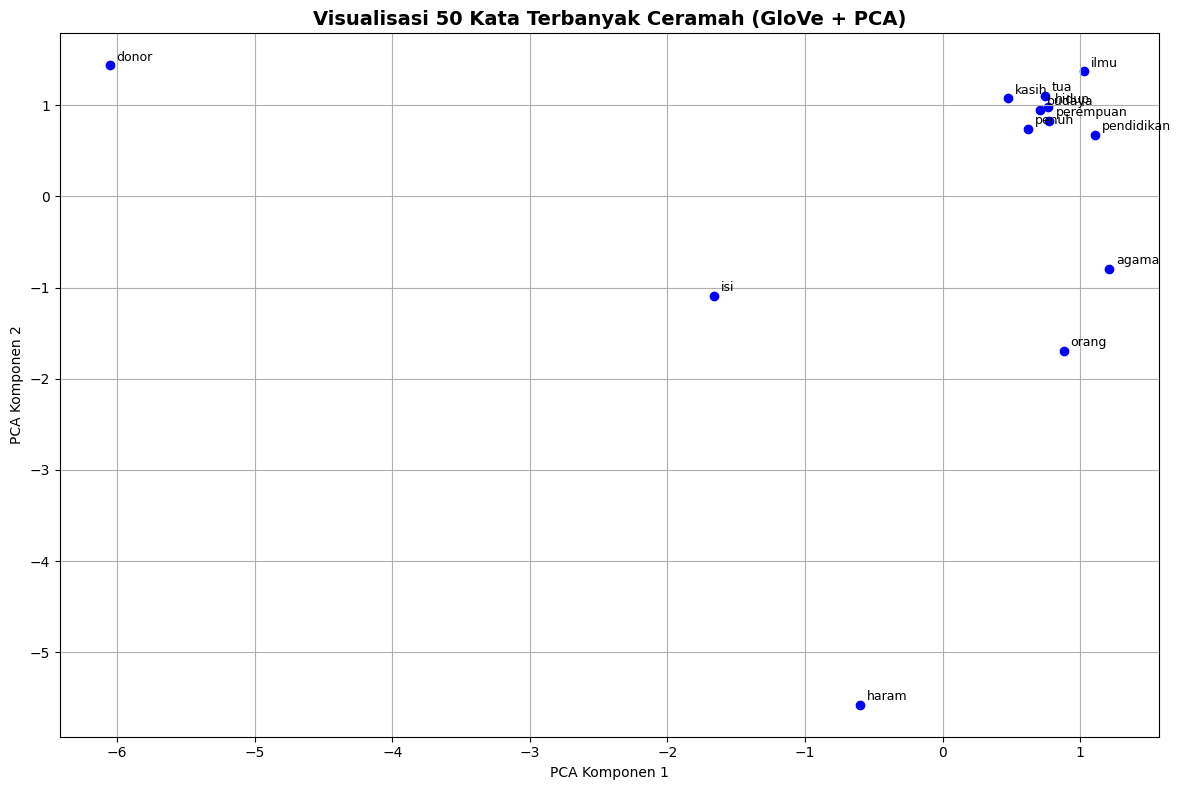

In [11]:
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], color="blue")

for i, word in enumerate(labels):
    plt.text(vectors_2d[i, 0] + 0.05, vectors_2d[i, 1] + 0.05, word, fontsize=9)

plt.title("Visualisasi 50 Kata Terbanyak Ceramah (GloVe + PCA)", fontsize=14, weight='bold')
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.tight_layout()

# Simpan grafik sebelum ditampilkan
plt.savefig("visualisasi_glove.png", dpi=300)
plt.show()
